In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Defining A Function

In [2]:
def f(x):
    return 3 *x + 5*x**2

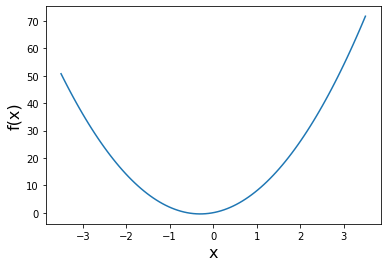

In [3]:
x=np.linspace(-3.5,3.5,100)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x))

### Analytical Integration

$$ f(x) = 3x + 5 x^{2} $$

$$ A = \int_{-3}^3 f(x)\,\mathrm{d}x = \int_{-3}^3\left(3x + 5 x^{2}\right)\,\mathrm{d}x = \left[\frac{3}{2}x^{2}+ \frac{5}{3}x^{3}\right]_{-3}^3 $$

In [4]:
analytical=((3/2)*3**2 + (5/3)*3**3)-((3/2)*(-3)**2 + (5/3)*(-3)**3)
analytical


90.0

### Creating Data

To apply numrical integeration methods, we will need to some data points on our plot, as usually you won't have the function itself in realstic stiuations. 

In [5]:
dataPoints=np.linspace(-3,3,13) # the difference between 2 points is 0.5
data=np.array([dataPoints,f(dataPoints)])

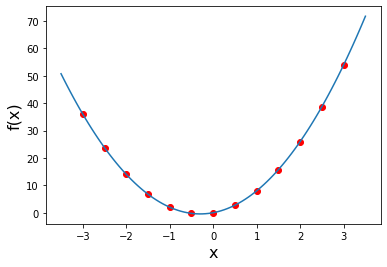

In [6]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x))
plt.scatter(dataPoints,f(dataPoints),color="red")

# 1.Riemann Sum

<BarContainer object of 13 artists>

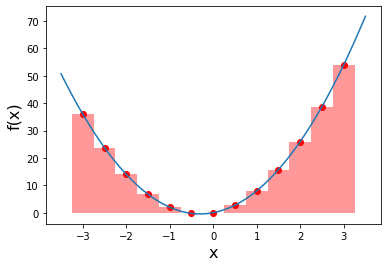

In [7]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x))
plt.scatter(dataPoints,f(dataPoints),color="red")
plt.bar(dataPoints,f(dataPoints),color="red",alpha=0.4,width=0.5) # This represents the rectangle method

$$ A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{n}\sum_{i=1}^n f(x_i)$$
where n: number of rectangles (number of data points-1)

In [8]:
def riemannSum(data):
    return ((data[0,-1]-data[0,0])/(len(data[0])-1)) * np.sum(data[1])

In [9]:
integralSum= riemannSum(data)
integralSum

113.75

# 2. Trapizoidal Method

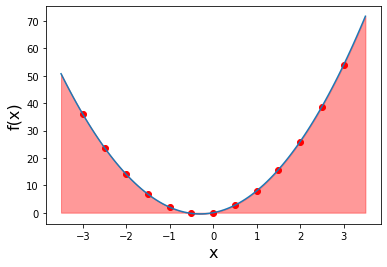

In [10]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,f(x))
plt.scatter(dataPoints,f(dataPoints),color="red")
plt.fill_between(x,f(x),0,color="red",alpha=0.4) #This represents the trapazoidal method

$$A = \int_{a}^b f(x)\,\mathrm{d}x \approx \sum_{i=1}^{n} \frac{f(x_{i+1})+f(x_{i})}{2}(x_{i+1}-x_i)$$
where n: number of trapazoids (which equals number of points -1)

In [11]:
def trapazoidIntegration(data):
   return 0.5 * np.sum(np.array([(data[1,i+1]+data[1,i]) * (data[0,i+1]-data[0,i])for i in range (len(data[0])-1)]))

In [12]:
trapzoidSum=trapazoidIntegration(data)
trapzoidSum

91.25

# 3. Simpson's rule

A rule for approximate integration using parabolas (polynomial interpolation of data) instead of straight line segments(e.g: Riemann sum and trapazoidal method) and it provides exact results with polynomials of degree less than or equal three

Note: this method works only if there are an odd number of data points.

$$A = \int_{a}^b f(x)\,\mathrm{d}x \approx \frac{b-a}{3n} \left[ f(x_1) + {4}f(x_2) + 2f(x_3) + 4f(x_4) + \dots + 4f(x_{n-3}) + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right]$$
where n: number of subintervals (data points - 1) [must be even]

In [13]:
def simpson(data):
    return (data[0,-1]-data[0,0])/(3*(len(data[0])-1)) * (data[1,0]+data[1,-1]+ 4*np.sum(data[1,1:-1:2])+2*np.sum(data[1,2:-2:2]))

In [14]:
sim=simpson(data)
sim #it gets the exact output as our function is of degree 2

90.0